In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [27]:
shifts = list(np.arange(0,100,10)) + [100]

In [28]:
shifts

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [29]:
decks=['batman_joker',
       'captain_america', 
       'adversarial_standard', 
       'adversarial_batman_joker',
       'adversarial_captain_america']
deck_names=['Batman Joker', 
           'Captain America',
           'Adversarial Standard',
           'Adversarial Batman Joker',
           'Adversarial Captain America']

In [30]:
def get_fs_results_bar(deck, deck_name, extra=False):
    
    base_dir = '../examples/follow_suit/results/incorrect_ILP_example_analysis'
    networks = ['softmax', 'edl_gen']
    
    softmax_results = []
    edl_gen_results = []
    if extra:
        fext = '_more_repeats'
        shifts = [95,96,97,98,99,100]
        non_std_shifts = shifts
        
    else:
        fext = ''
        shifts = list(np.arange(0,100,10)) + [100]
        non_std_shifts = list(np.arange(10,110,10))
        
    # Standard
    if not extra:
        for n_idx, n in enumerate(networks):
            with open(base_dir+'/'+n+'/standard.json', 'r') as rf:
                deck_results = json.loads(rf.read())
                val = round(deck_results['noise_pct_0']['pct_incorrect_examples']*100)
                if n_idx == 0:
                    softmax_results.append(val)
                else:
                    edl_gen_results.append(val)
    

    for p in non_std_shifts:
        for n_idx, n in enumerate(networks):
             with open(base_dir+'/'+n+'/'+deck+fext+'.json', 'r') as rf:
                deck_results = json.loads(rf.read())
                val = round(deck_results['noise_pct_'+str(p)]['pct_incorrect_examples']*100)
                if n_idx == 0:
                    softmax_results.append(val)
                else:
                    edl_gen_results.append(val)
    
    x = np.arange(len(shifts))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    ax.grid(zorder=0)
    rects1 = ax.bar(x - width/2, softmax_results, width, label='Softmax',zorder=3)
    rects2 = ax.bar(x + width/2, edl_gen_results, width, label='EDL-GEN',zorder=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage of incorrect ILP examples (%)')
    ax.set_xlabel('Percentage of data points subject to distributional shift (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(shifts)
    ax.set_ylim([-0.05,95])
    ax.legend()
    

#     ax.bar_label(rects1, padding=5)
#     ax.bar_label(rects2, padding=5)

    fig.tight_layout()
    plt.savefig('graphs/follow_suit/'+d+fext+'.pdf', bbox_inches='tight')
#     plt.show()

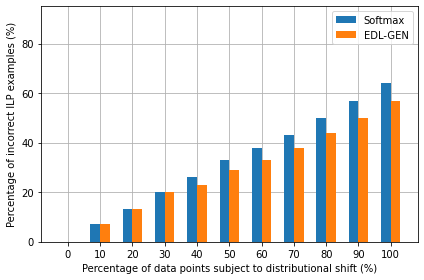

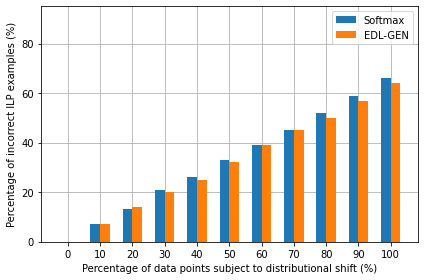

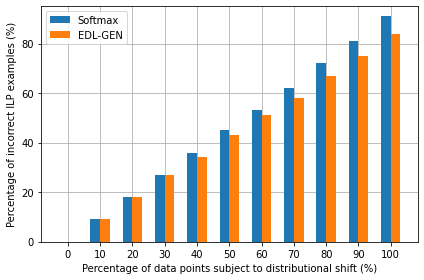

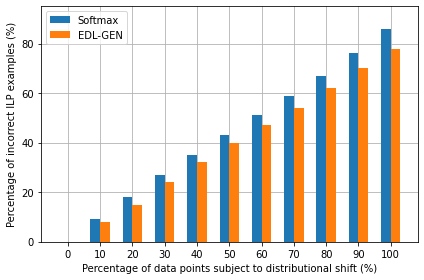

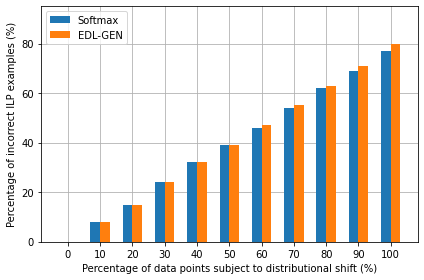

In [11]:
for d_idx, d in enumerate(decks):
    get_fs_results_bar(d, deck_names[d_idx])

# 50 repeats high shifts

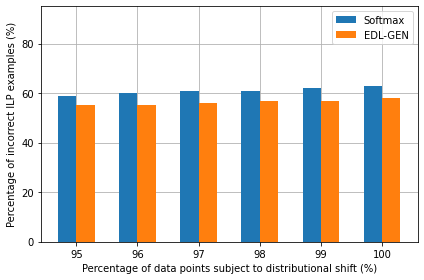

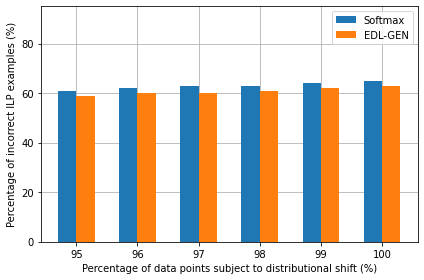

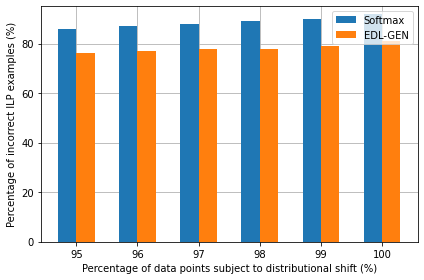

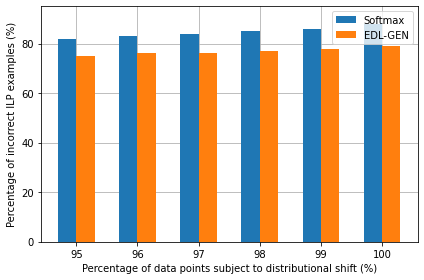

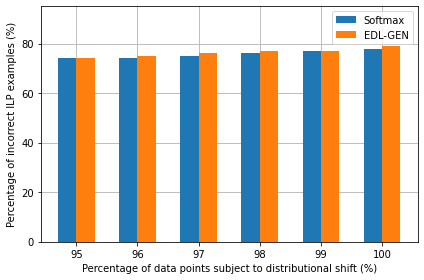

In [12]:
for d_idx, d in enumerate(decks):
    get_fs_results_bar(d, deck_names[d_idx], extra=True)

# Sudoku

In [31]:
def get_sud_results_bar(grid, extra=False):  
    base_dir = '../examples/'+grid+'/results/incorrect_ILP_example_analysis'
    networks = ['softmax', 'edl_gen']
    
    softmax_results = []
    edl_gen_results = []
    
    if extra:
        fext = '_more_repeats'
        if grid == 'sudoku_4x4':
            shifts = [80,85,90,95,96]
        else:    
            shifts = [95,96,97,98,99]
        
        non_std_shifts = shifts
        
    else:
        fext = ''
        shifts = list(np.arange(0,100,10)) + [100]
        non_std_shifts = list(np.arange(10,110,10))
        
    if not extra:
        for n_idx, n in enumerate(networks):
             with open(base_dir+'/'+n+'/standard.json', 'r') as rf:
                grid_results = json.loads(rf.read())
                val = round(grid_results['noise_pct_0']['pct_incorrect_examples']*100)
                if n_idx == 0:
                    softmax_results.append(val)
                else:
                    edl_gen_results.append(val)
    
    
    for p in list(non_std_shifts):
        for n_idx, n in enumerate(networks):
             with open(base_dir+'/'+n+'/rotated'+fext+'.json', 'r') as rf:
                grid_results = json.loads(rf.read())
                val = round(grid_results['noise_pct_'+str(p)]['pct_incorrect_examples']*100)
                if n_idx == 0:
                    softmax_results.append(val)
                else:
                    edl_gen_results.append(val)
    
    x = np.arange(len(shifts))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    ax.grid(zorder=0)
    rects1 = ax.bar(x - width/2, softmax_results, width, label='Softmax',zorder=3)
    rects2 = ax.bar(x + width/2, edl_gen_results, width, label='EDL-GEN',zorder=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage of incorrect ILP examples (%)')
    ax.set_xlabel('Percentage of data points subject to distributional shift (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(shifts)
    ax.set_ylim([-0.05,95])
    ax.legend()
    

#     ax.bar_label(rects1, padding=5)
#     ax.bar_label(rects2, padding=5)

    fig.tight_layout()
    plt.savefig('graphs/'+grid+fext+'.pdf', bbox_inches='tight')
#     plt.show()

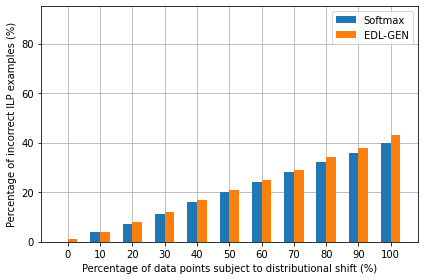

In [32]:
get_sud_results_bar('sudoku_4x4')

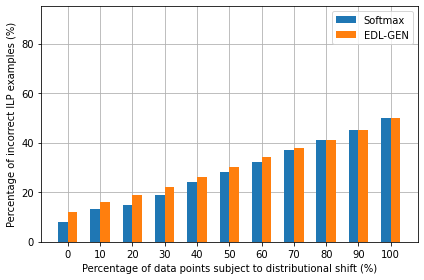

In [33]:
get_sud_results_bar('sudoku_9x9')

# 50 repeats

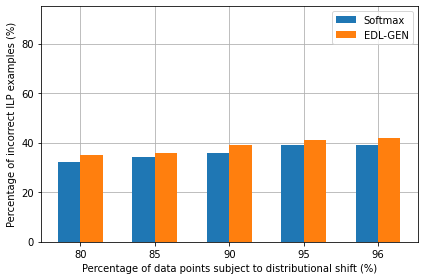

In [34]:
get_sud_results_bar('sudoku_4x4', extra=True)

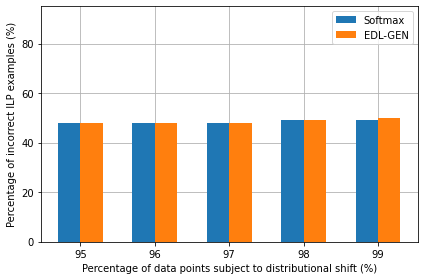

In [35]:
get_sud_results_bar('sudoku_9x9', extra=True)